In [1]:
import pandas as pd

In [2]:
# load the data
data = pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/monthly_sales.csv')

In [3]:
# top 5 rows
data.head()

,Month,Sales
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
# shape of data
data.shape

(105, 2)

In [5]:
# correct the date format
data['Month'] = pd.to_datetime(data.Month)

In [6]:
# change the index
data.set_index('Month',inplace=True)

#**Checking the stationarity of series**

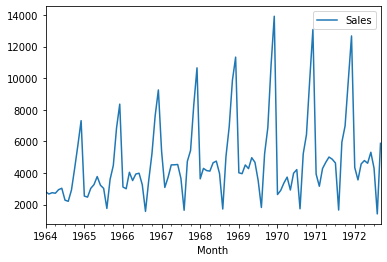

In [7]:
# check how series looks like
data.plot()

In [8]:
# Stastical way of testing the stationarity
from statsmodels.tsa.stattools import adfuller

H0: Non-Stationary (Accepted if p > 0.05)

H1: Stationary (Accepted if p < 0.05)

In [9]:
# checking the stationarity
result = adfuller(data['Sales'])
print('No differentiation: \n P-Value',result[1])

result = adfuller(data['Sales'].diff().dropna())
print('1st differentiation: \n P-Value',result[1])

result = adfuller(data['Sales'].diff().diff().dropna())
print('2nd differentiation: \n P-Value',result[1])

No differentiation: 
 P-Value 0.363915771660247
1st differentiation: 
 P-Value 2.519620447387081e-10
2nd differentiation: 
 P-Value 3.643434776644668e-12


In [10]:
# Using 1st order differentiation
data['Stationary'] = data['Sales'].diff()

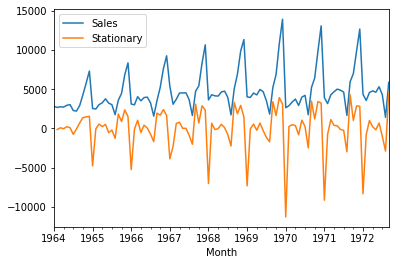

In [11]:
# take look at original series and stationary series
data.plot()

#**Finding parameters required for SARIMA**

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


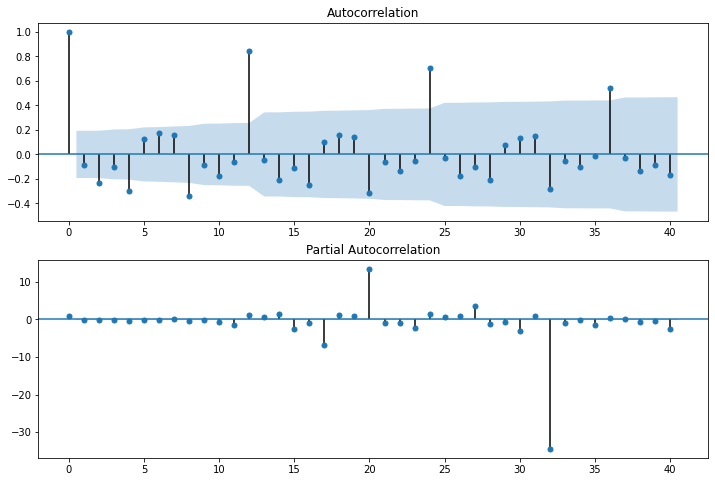

In [12]:
# import acf and pacf plots to calculate p,d,q values
import statsmodels.api as sm
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(data['Stationary'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(data['Stationary'].dropna(),lags=40,ax=ax2)

Thus we have p = 1, d=1, q=1, seasonal_component=12

#**Build SARIMA model**

In [13]:
# Import sarima model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [14]:
# Initailize and train
srm = SARIMAX(data.Sales.dropna(), order=(1,1,1), seasonal_order=(1,1,1,12))
model = srm.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [15]:
# Summary of the model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Sales   No. Observations:                  105
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -738.402
Date:                            Thu, 01 Sep 2022   AIC                           1486.804
Time:                                    15:34:24   BIC                           1499.413
Sample:                                01-01-1964   HQIC                          1491.893
                                     - 09-01-1972                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2790      0.081      3.433      0.001       0.120       0.438
ma.L1         -0.9494      0.043    -22.334      0.000      -1.033      -0.866
ar.S.L12      -0.4544      0.303     -1.499      0.134      -1.049       0.140
ma.S.L12       0.2450      0.311      0.788      0.431      -0.365       0.855
sigma2      5.055e+05   6.12e+04      8.265      0.000    3.86e+05    6.25e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 8.70
Prob(Q):                              0.61   Prob(JB):                         0.01
Heteroskedasticity (H):               1.18   Skew:                            -0.21
Prob(H) (two-sided):                  0.64   Kurtosis:                         4.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#**Predecting and evaluating the series**

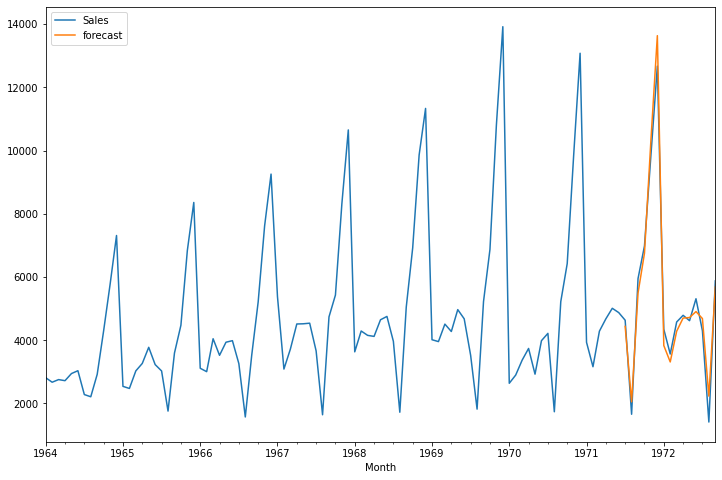

In [16]:
data['forecast']=model.predict(start=90,end=200,dynamic=True)
data[['Sales','forecast']].plot(figsize=(12,8))

In [17]:
# forecasting next 10 months values
model.forecast(10)

1972-10-01     7023.699127
1972-11-01     9996.175566
1972-12-01    12891.997405
1973-01-01     4561.380425
1973-02-01     3718.695244
1973-03-01     4792.240635
1973-04-01     5034.490460
1973-05-01     5047.836783
1973-06-01     5488.453666
1973-07-01     4593.507459
Freq: MS, Name: predicted_mean, dtype: float64